In [15]:
%matplotlib inline
from __future__ import print_function, division, unicode_literals
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter, MultipleLocator
from pygaarst import raster
import brewer2mpl
import configs
import h5py

In [3]:
productdir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/visual/figures//"

In [90]:
font = {'family' : 'Corbel',
        'weight' : 'bold',
        'size'   : 24}

mpl.rc('font', **font)
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.default']='regular'
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)
colors = bmap.mpl_colors
mpl.rcParams['axes.color_cycle'] = colors

In [91]:
outdir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/visual/tmp/"

## Plot Hyperion radiance spectra

Load Hyperion data for Crazy fire

In [39]:
basedir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/"
dir_2004c = "2004Crazy"
hypscene_2004c = "EO1H0680132004192110KY"

In [40]:
hypsc = raster.Hyperionscene(os.path.join(basedir, dir_2004c, hypscene_2004c))
hypsc.infix = '_CLIP'

INFO:root:The value 2004 192 21:07:57 couldn't be parsed as int, float, date, time, datetime. Returning it as string.
INFO:root:The value 2004 192 21:09:12 couldn't be parsed as int, float, date, time, datetime. Returning it as string.


Also load some boundary spectra

In [41]:
firename = 'boundary'

In [42]:
indir = configs.FIREPARAM[firename]['filedir']

In [43]:
infilename = os.path.join(basedir, indir, "{}_random_forest_extraction.tif".format(firename))
classification = raster.GeoTIFF(infilename)
firecond = classification.data == 0
fireclass = np.ma.masked_not_equal(classification.data, 0)
backgroundclass = np.ma.masked_outside(classification.data, 1, 2)
scarclass = np.ma.masked_not_equal(classification.data, 1)
veggieclass = np.ma.masked_not_equal(classification.data, 2)

In [44]:
fireindices = zip(*np.where(~fireclass.mask))
backgroundindices = zip(*np.where(~backgroundclass.mask))
scarindices = zip(*np.where(~scarclass.mask))
veggieindices = zip(*np.where(~veggieclass.mask))

In [82]:
infn = os.path.join(basedir, indir, "{}_hullallspecs_calib.hdf5".format(firename))
with h5py.File(infn, "r") as infh:
    spectest = infh['spectrum'][...]
    i_buff = infh['i_row_idx'][...]
    j_buff = infh['j_col_idx'][...]
    wav = infh['bandwavelenght_nm'][...]

buff_indices = zip(i_buff, j_buff)
intersectionidx = [buff_indices.index(pair) for pair in fireindices]
firespecs_SWIR = spectest[intersectionidx, 98:]
firespecs = spectest[intersectionidx, :]

In [83]:
firespecs_SWIR.shape

(663, 100)

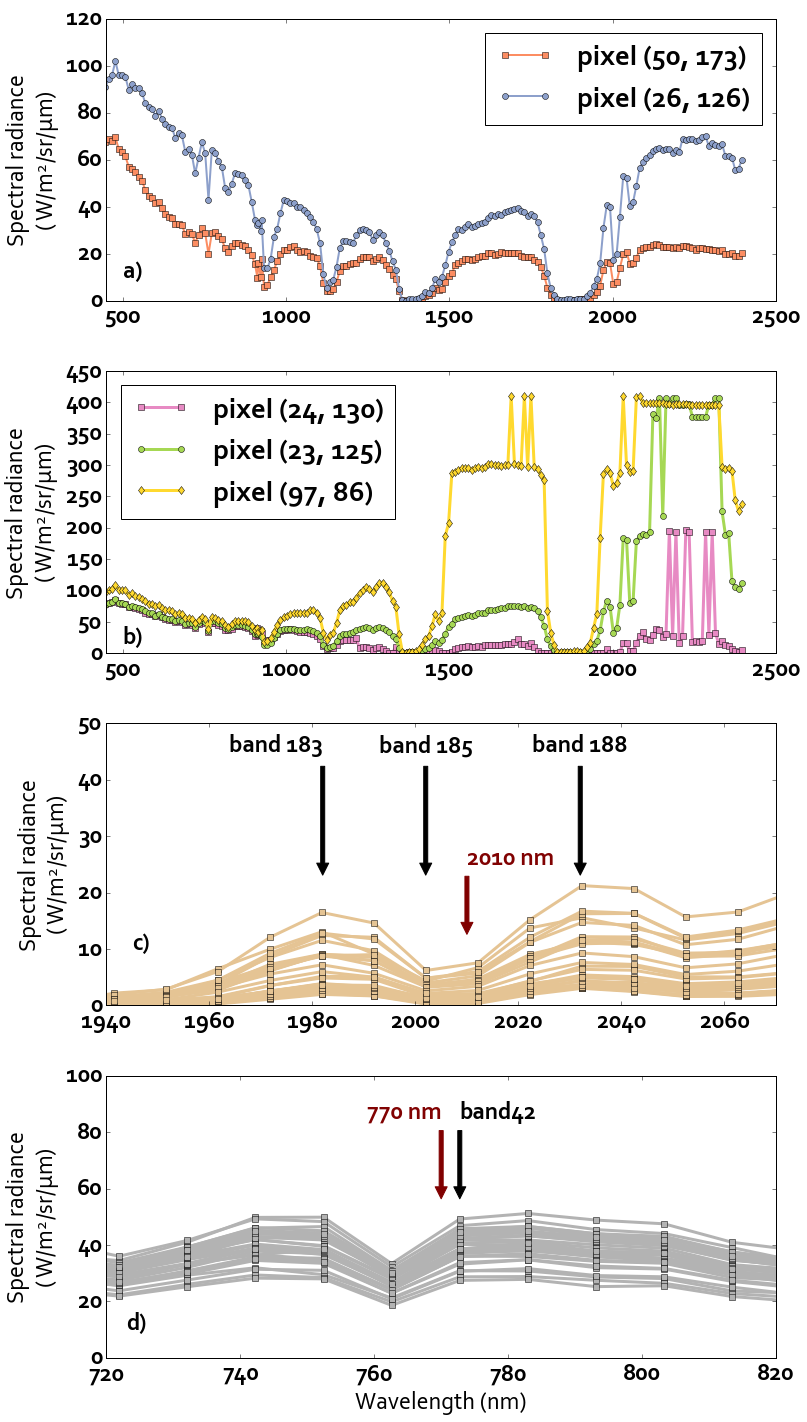

In [104]:
# Hyperion
f, axs = plt.subplots(4, figsize=(12, 24))

for ax in axs:
    ax.set_ylabel('Spectral radiance\n$(\,W / m^2 / sr / \mu m)$')
    
axs[0].plot(
    hypsc.calibratedwavelength_nm, hypsc.spectrum(50, 173), 
        's-', linewidth=2, color=colors[1],
    label="pixel ({}, {})".format(50, 173))
axs[0].plot(hypsc.calibratedwavelength_nm, hypsc.spectrum(26, 126), 
        'o-', linewidth=2, color=colors[2],
    label="pixel ({}, {})".format(26, 126))
axs[0].legend()
axs[0].set_xlim(450, 2500)
axs[0].text(500, 10, "a)", fontsize=24)

axs[1].plot(
    hypsc.calibratedwavelength_nm, hypsc.spectrum(24, 130), 
        's-', linewidth=3, color=colors[3],
    label="pixel ({}, {})".format(24, 130))
axs[1].plot(hypsc.calibratedwavelength_nm, hypsc.spectrum(23, 125), 
        'o-', linewidth=3, color=colors[4],
    label="pixel ({}, {})".format(23, 125))
axs[1].plot(hypsc.calibratedwavelength_nm, hypsc.spectrum(97, 86), 
        'd-', linewidth=3,color=colors[5],
    label="pixel ({}, {})".format(97, 86))
axs[1].legend(loc=0)
axs[1].set_xlim(450, 2500)
axs[1].text(500, 15, "b)", fontsize=24)

axs[2].set_xlim(1940, 2070)
axs[2].set_ylim(0, 50)
axs[2].annotate('band 185', xy=(2002, 22), xytext=(2002, 45),
        ha='center',
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
axs[2].annotate('band 188', xy=(2032, 22), xytext=(2032, 45),
        ha='center',
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
axs[2].annotate('band 183', xy=(1982, 22), xytext=(1982, 45),
        ha='right',
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
axs[2].annotate('2010 nm', xy=(2010, 12), xytext=(2010, 25),
        ha='left', color='maroon',
        arrowprops=dict(facecolor='maroon', ec='maroon', shrink=0.05),
        )
for spec in firespecs_SWIR[14:45]:
    axs[2].plot(wav[98:], spec, 's-', linewidth=3, color=colors[6])  
axs[2].text(1945, 10, "c)", fontsize=24)

axs[3].set_xlim(720, 820)
axs[3].set_ylim(0, 100)
axs[3].annotate("band42", xy=(772.78, 55), xytext=(772.78, 85),
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
axs[3].annotate("770 nm", xy=(770, 55), xytext=(770, 85),
        ha='right', color='maroon',
        arrowprops=dict(facecolor='maroon', ec='maroon', shrink=0.05),
        )
for spec in firespecs[14:45]:
    axs[3].plot(wav, spec, 's-', linewidth=3, color=colors[7])  
axs[3].text(723, 10, "d)", fontsize=24)

axs[3].set_xlabel("Wavelength (nm)")
f.subplots_adjust(hspace=0.25)


In [105]:
outfn = 'Fig05_LR.jpg'
f.savefig(os.path.join(productdir, outfn), dpi=150, bb_inches='tight')

In [106]:
outfn = 'Fig05.jpg'
f.savefig(os.path.join(productdir, outfn), dpi=300, bb_inches='tight')